In [1]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [2]:
# Fetch an image from the downloaded dataset
tr_images = fmnist.data
tr_targets = fmnist.targets

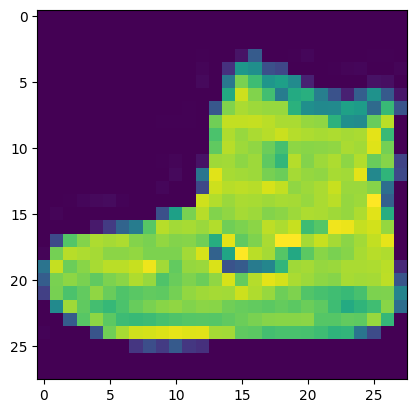

In [3]:
import matplotlib.pyplot as plt 
plt.imshow(tr_images[0])

#### Perform Scaling on top of the image

In [10]:
from imgaug import augmenters as iaa
import numpy as np
aug = iaa.Affine(scale=2)
img = np.array(tr_images[0])

Text(0.5, 1.0, 'Scaled Image')

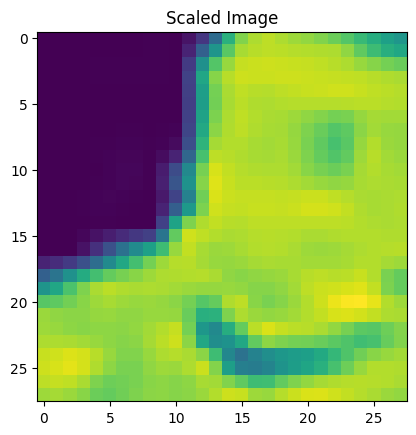

In [15]:
plt.imshow(aug.augment_image(img))
plt.title("Scaled Image")

The image has been zoomed into considerable. This has resulted in some pixels being chopped off from the original, though the shape remains the same.

it is important to note that first you have to convert the image to a numpy array before applying the augment function the image

#### Image Translation

Text(0.5, 1.0, 'Translated image by 10')

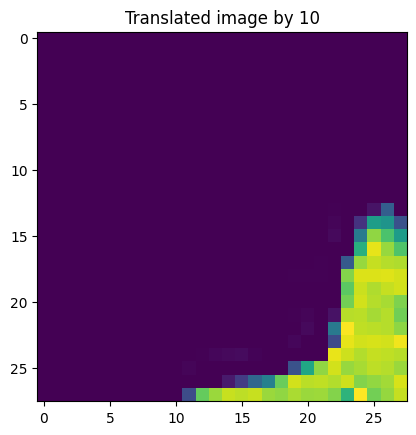

In [16]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(img))
plt.title("Translated image by 10")

The translation of the image done above resulted in translated it by 10 pixels in the x and y axes in the translate_px parameter

However, if we wanted to perform translation more in one axis and less in the other axis, we must specify the amount of translation we want in each axis.

This can be don with the use of a dictionary

Text(0.5, 1.0, 'Translated 10 pixels right and 2 pixels down')

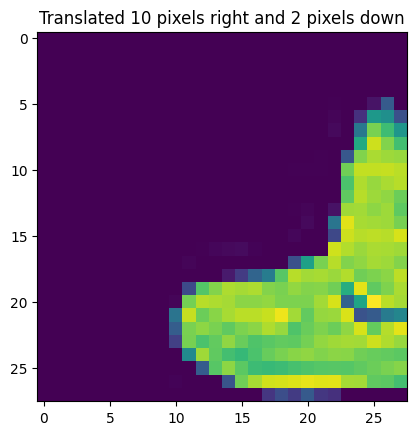

In [17]:
aug = iaa.Affine(translate_px={'x':10, "y":2})
plt.imshow(aug.augment_image(img))
plt.title("Translated 10 pixels right and 2 pixels down")

Note that so far in all our transformations we've done, the translations and the scaling, some part of our pixels of the images are chopped of. we would deal with this situation later.

The problem with this cropping that chops off some part of the images is that information is lost along the way.

But for now, let's see how rotation and shearing impacts on image augmentation

Text(0.5, 1.0, 'Scaled Image')

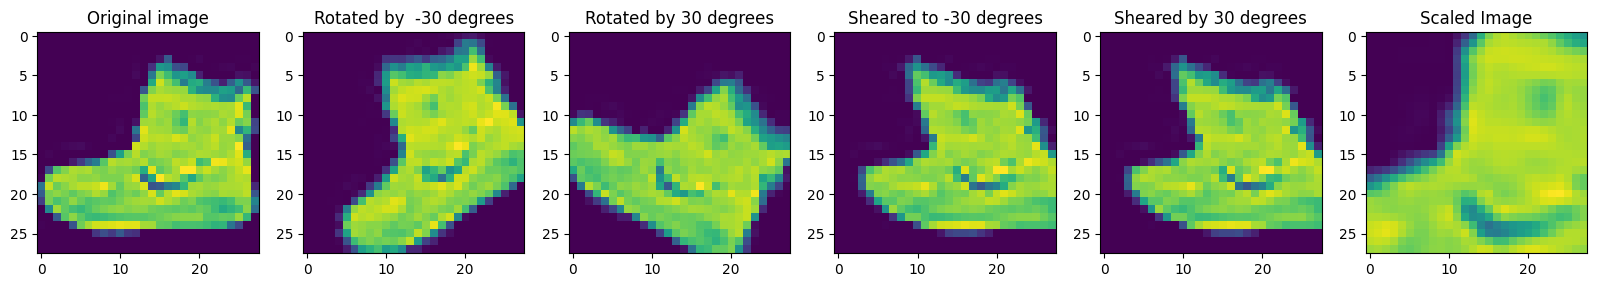

In [19]:
aug_rotate = iaa.Affine(rotate=-30)
aug_rotate_2 = iaa.Affine(rotate=30)
aug_shear = iaa.Affine(shear=-30)
aug_shear_2 = iaa.Affine(shear=30)
aug_scaled = iaa.Affine(scale=2)

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title("Original image")

plt.subplot(162)
plt.imshow(aug_rotate.augment_image(img))
plt.title("Rotated by  -30 degrees")

plt.subplot(163)
plt.imshow(aug_rotate_2.augment_image(img))
plt.title("Rotated by 30 degrees")

plt.subplot(164)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared to -30 degrees")

plt.subplot(165)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by 30 degrees")

plt.subplot(166)
plt.imshow(aug_scaled.augment_image(img))
plt.title("Scaled Image")

To fix the problem that arises in transformation that leads to loss of information due to cropping, we can pass in a parameter when creating the instance of the  object

Text(0.5, 1.0, 'Scaled Image')

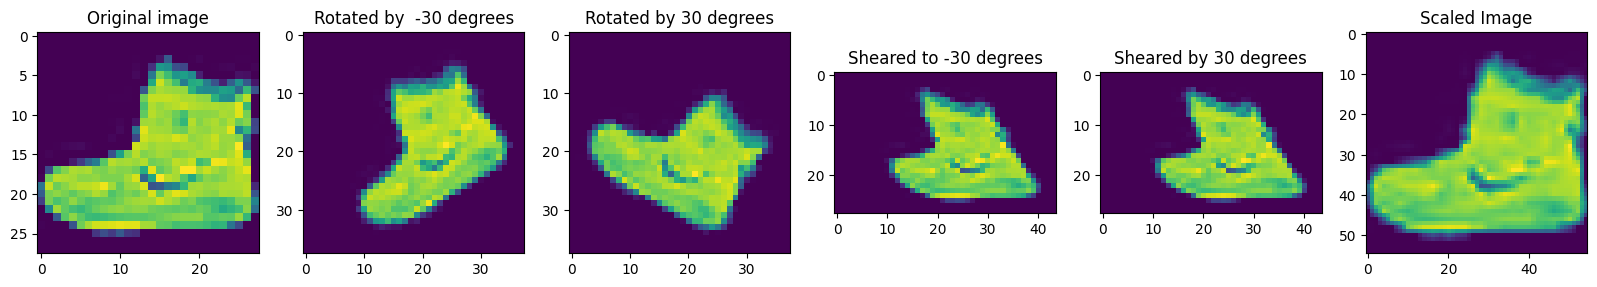

In [20]:
aug_rotate = iaa.Affine(rotate=-30, fit_output=True)
aug_rotate_2 = iaa.Affine(rotate=30, fit_output=True)
aug_shear = iaa.Affine(shear=-30, fit_output=True)
aug_shear_2 = iaa.Affine(shear=30, fit_output=True)
aug_scaled = iaa.Affine(scale=2, fit_output=True)

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title("Original image")

plt.subplot(162)
plt.imshow(aug_rotate.augment_image(img))
plt.title("Rotated by  -30 degrees")

plt.subplot(163)
plt.imshow(aug_rotate_2.augment_image(img))
plt.title("Rotated by 30 degrees")

plt.subplot(164)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared to -30 degrees")

plt.subplot(165)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by 30 degrees")

plt.subplot(166)
plt.imshow(aug_scaled.augment_image(img))
plt.title("Scaled Image")